In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')

import matplotlib 
plt.rc("font", family="Malgun Gothic")

In [3]:
%pwd

'\\\\172.30.1.8\\데이터사업추진팀\\01. 프로젝트\\12. NIPA AI 바우처\\2022\\03_동서한의원\\Data'

In [10]:
A = pd.read_csv('./표준경혈DB.csv')
A.head(1)

,대분류,대분류코드,중분류,중분류코드,중분류한자,부위,취혈,침구법,url
0,수태음폐경,LU,중부,LU1,中府,"앞가슴부위, 첫째 갈비사이공간(the 1st intercostal space)과 같...","먼저 雲門(LU2)을 정한 후, 雲門(LU2)에서 아래쪽으로 1寸이 되는 지점에서 ...",- 直刺 0.3～0.5寸\n- 斜刺 0.5～1寸,https://www.kmcric.com/database/acupoint/LU/LU1


In [15]:
face = 'LI20 LI19 SI18 SI19 TE16 TE17 TE18 TE19 TE20 TE21 TE22 TE23 ST1 ST2 ST3 ST4 ST5 ST6 ST7 ST8 BL1 BL2 BL3 BL4 BL5 BL6 BL7 BL8 BL9 BL10 GB1 GB2 GB3 GB4 GB5 GB6 GB7 GB8 GB9 GB10 GB11 GB12 GB13 GB14 GB15 GB16 GB17 GB18 GB19 GB20 GV15 GV16 GV17 GV18 GV19 GV20 GV21 GV22 GV23 GV24 GV25 GV26 GV27 GV28 CV24'.split(' ')

In [16]:
exs = '사신총 당양 인당 어요 태양 이첨 구후 상영향 내영향 취천 해천 금진 옥액 예명'.split(' ')

In [17]:
FaceNhead = face + exs

In [28]:
FaceNhead_df = pd.DataFrame(columns = A.columns)
for item in face:
    if item in list(A['중분류코드']):
        FaceNhead_df = FaceNhead_df.append(A[A['중분류코드']==item])
    else:
        print(item)

In [29]:
# FaceNhead_df = pd.DataFrame(columns = A.columns)
for item in exs:
    if item in list(A['중분류']):
        FaceNhead_df = FaceNhead_df.append(A[A['중분류']==item])
    else:
        print(item)

In [23]:
len(exs)

14

In [22]:
len(FaceNhead_df)

79

In [20]:
len(face)

65

In [24]:
65+14

79

In [30]:
FaceNhead_df = FaceNhead_df.reset_index(0)
FaceNhead_df = FaceNhead_df.drop('index',axis=1)
FaceNhead_df

,대분류,대분류코드,중분류,중분류코드,중분류한자,부위,취혈,침구법,url
0,수양명대장경,LI,영향,LI20,迎香,"얼굴, 코입술고랑(nasolabial sulcus) 위, 콧방울(ala of the...",- 直刺 0.2～0.3寸,NONE,https://www.kmcric.com/database/acupoint/LI/LI20
1,수양명대장경,LI,화료,LI19,禾髎,"얼굴, 인중 부위(philtrum)의 중점과 같은 높이, 콧구멍 가쪽모서리 아래 쪽.",콧구멍가쪽모서리의 수직선과 인중 도랑의 중점에 해당하는 점의 수평선의 교점에서 취혈한다.,- 直刺 0.2～0.3寸\n- 斜刺 0.3～0.5寸,https://www.kmcric.com/database/acupoint/LI/LI19
2,수태양소장경,SI,관료,SI18,顴髎,"얼굴, 광대뼈(zygomatic bone) 아래쪽, 가쪽눈구석(outer canth...",광대뼈 아래모서리의 수평선과 가쪽눈 구석의 수직선이 만나는 부위의 오목한 곳에서 취...,- 直刺 0.2～0.3寸\n- 斜刺 0.5～1寸 (下方으로 향해)\n- 禁鍼灸 (『...,https://www.kmcric.com/database/acupoint/SI/SI18
3,수태양소장경,SI,청궁,SI19,聽宮,"얼굴, 귀구슬(tragus) 중심의 앞모서리와 아래턱뼈 관절돌기(condylar p...","입을 약간 벌릴 때 나타나는 귀구슬 중심의 앞쪽 오목한 곳으로, 耳門(TE21)과 ...",- 直刺 0.3～0.5寸\n- 斜刺 0.5～1寸 (입을 벌리고 약간 下部로 향하여),https://www.kmcric.com/database/acupoint/SI/SI19
4,수소양삼초경,TE,천유,TE16,天牖,"목 앞부위, 턱뼈각(angle of the mandible)과 같은 높이, 목빗근(...",- 直刺 0.3～0.5寸 (不宜深刺),NONE,https://www.kmcric.com/database/acupoint/TE/TE16
...,...,...,...,...,...,...,...,...,...
74,경외기혈,EX,취천,EX-HN10,聚泉,舌의 背側 정중선의 중점.,혀를 내밀어서 背側面 정중선의 중점에서 취혈한다.,"- 直刺 0.1～0.2寸\n- 舌强, 舌苔에는 點刺出血",https://www.kmcric.com/database/acupoint/EX/EX...
75,경외기혈,EX,해천,EX-HN11,海泉,舌下 系帶의 중점.,혀를 위로 말아서 舌系帶 중점의 靜脈部位에서 취혈한다.,"- 直刺 0.1～0.2寸\n- 舌强, 舌苔에는 點刺出血",https://www.kmcric.com/database/acupoint/EX/EX...
76,경외기혈,EX,금진,EX-HN12,金津,"舌下의 舌系帶 兩側 靜脈部位로, 左側을 金津, 右側을 玉液이라 한다.","혀를 위로 말아서 舌下의 舌系帶 兩側 靜脈에서 左側을 金津, 右側을 玉液으로 취혈한다.",- 點刺出血,https://www.kmcric.com/database/acupoint/EX/EX...
77,경회기혈,EX,옥액,EX-HN13,玉液,"舌下의 舌系帶 兩側 靜脈部位로, 左側을 金津, 右側을 玉液이라 한다.","혀를 위로 말아서 舌下의 舌系帶 兩側 靜脈에서 左側을 金津, 右側을 玉液으로 취혈한다.",- 點刺出血,https://www.kmcric.com/database/acupoint/EX/EX...


NameError: name 'pd' is not defined

In [3]:
import pandas as pd
AA = pd.read_csv(r'\\172.30.1.8\데이터사업추진팀\01. 프로젝트\12. NIPA AI 바우처\2022\03_동서한의원\Data\assemble\두상경혈_79.csv')
import selenium
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.options import Options
from tqdm import tqdm

options = Options()
# options.add_argument('--headless') #headless모드 브라우저가 뜨지 않고 실행됩니다.
# options.add_argument('--window-size= x, y') #실행되는 브라우저 크기를 지정할 수 있습니다.
# options.add_argument('--start-maximized') #브라우저가 최대화된 상태로 실행됩니다.
# options.add_argument('--start-fullscreen') #브라우저가 풀스크린 모드(F11)로 실행됩니다.
# options.add_argument('--blink-settings=imagesEnabled=false') #브라우저에서 이미지 로딩을 하지 않습니다.
# options.add_argument('--mute-audio') #브라우저에 음소거 옵션을 적용합니다.
# options.add_argument('incognito') #시크릿 모드의 브라우저가 실행됩니다.
options.add_experimental_option("excludeSwitches", ["enable-logging"]) #selenium 작동 안될 때
driver = webdriver.Chrome(executable_path=ChromeDriverManager().install(),chrome_options=options)   

from tqdm import tqdm
import time
import warnings
warnings.filterwarnings('ignore')
import pandas as pd


import keyboard
front_face_url = []
side_face_url = []
back_url = []
head_url = []
urls = list(AA['url'])
for i,url in tqdm(enumerate(urls)):
    driver.get(urls[i])
    while True:
        if keyboard.read_key()=='f':
            front_face_url.append(url)
            break

        elif keyboard.read_key()=='j':
            side_face_url.append(url)
            break

        elif keyboard.read_key()=='space':
            back_url.append(url) 
            break

        elif keyboard.read_key()=='h':
            head_url.append(url)
            break
        
        elif keyboard.read_key()=='esc':
            driver.close()
            break




====== WebDriver manager ======
Current google-chrome version is 99.0.4844
Get LATEST chromedriver version for 99.0.4844 google-chrome
Trying to download new driver from https://chromedriver.storage.googleapis.com/99.0.4844.51/chromedriver_win32.zip
Driver has been saved in cache [C:\Users\baeky\.wdm\drivers\chromedriver\win32\99.0.4844.51]
79it [04:11,  3.19s/it]


In [5]:
print(len(front_face_url))
print(len(side_face_url))
print(len(back_url))
print(len(head_url))
# print(len(front_face_url))

32
21
12
14


In [6]:
32+21+12+14

79

In [7]:
front_face =pd.DataFrame(columns=AA.columns)
for url in front_face_url:
    front_face = front_face.append(AA[AA['url']==url])

In [9]:
front_face.to_csv('전면경혈점32.csv',index=False,encoding='utf-8-sig')

In [10]:
side_face =pd.DataFrame(columns=AA.columns)
for url in side_face_url:
    side_face = side_face.append(AA[AA['url']==url])

In [11]:
back_face =pd.DataFrame(columns=AA.columns)
for url in back_url:
    back_face = back_face.append(AA[AA['url']==url])

In [12]:
head =pd.DataFrame(columns=AA.columns)
for url in head_url:
    head = head.append(AA[AA['url']==url])

In [13]:
print(len(front_face))
print(len(side_face))
print(len(back_face))
print(len(head))

32
21
12
14


In [14]:
side_face.to_csv('측면경혈점21.csv',index=False,encoding='utf-8-sig')
back_face.to_csv('후두부경혈점12.csv',index=False,encoding='utf-8-sig')
head.to_csv('상두부경혈점14.csv',index=False,encoding='utf-8-sig')

In [15]:
front_face

,대분류,대분류코드,중분류,중분류코드,중분류한자,부위,취혈,침구법,url
0,수양명대장경,LI,영향,LI20,迎香,"얼굴, 코입술고랑(nasolabial sulcus) 위, 콧방울(ala of the...",- 直刺 0.2～0.3寸,NONE,https://www.kmcric.com/database/acupoint/LI/LI20
1,수양명대장경,LI,화료,LI19,禾髎,"얼굴, 인중 부위(philtrum)의 중점과 같은 높이, 콧구멍 가쪽모서리 아래 쪽.",콧구멍가쪽모서리의 수직선과 인중 도랑의 중점에 해당하는 점의 수평선의 교점에서 취혈한다.,- 直刺 0.2～0.3寸\n- 斜刺 0.3～0.5寸,https://www.kmcric.com/database/acupoint/LI/LI19
2,수태양소장경,SI,관료,SI18,顴髎,"얼굴, 광대뼈(zygomatic bone) 아래쪽, 가쪽눈구석(outer canth...",광대뼈 아래모서리의 수평선과 가쪽눈 구석의 수직선이 만나는 부위의 오목한 곳에서 취...,- 直刺 0.2～0.3寸\n- 斜刺 0.5～1寸 (下方으로 향해)\n- 禁鍼灸 (『...,https://www.kmcric.com/database/acupoint/SI/SI18
11,수소양삼초경,TE,사죽공,TE23,絲竹空,"머리, 눈썹 가쪽끝의 오목한 곳.",- 直刺 0.2～0.3寸,NONE,https://www.kmcric.com/database/acupoint/TE/TE23
12,족양명위경,ST,승읍,ST1,承泣,"얼굴, 동공(pupil)에서 수직으로 아래 쪽, 안구(eyeball)와 눈확아래모서...",- 直刺 0.2～0.3寸,NONE,https://www.kmcric.com/database/acupoint/ST/ST1
13,족양명위경,ST,사백,ST2,四白,"얼굴, 눈확아래구멍(infraorbital foramen).",눈확아래구멍은 동공(pupil)에서 수직으로 아래쪽에서 촉지된다.,- 直刺 0.2～0.3寸\n- 斜刺 0.3～0.5寸,https://www.kmcric.com/database/acupoint/ST/ST2
14,족양명위경,ST,거료,ST3,巨髎,"얼굴, 동공(pupil)에서 수직으로 아래 쪽, 콧방울(ala of the nose...","고개를 들고 앞을 바로 볼 때, 동공을 지나는 수직선과 콧방울 아래모서리를 지나는 ...",- 直刺 0.3～0.5寸\n- 斜刺 0.5～1寸,https://www.kmcric.com/database/acupoint/ST/ST3
15,족양명위경,ST,지창,ST4,地倉,"얼굴, 입꼬리에서 가쪽으로 0.4寸.","입꼬리 옆쪽, 코입술고랑(nasolabialsulcus) 위 혹은 코입술고랑의 연장...",- 直刺 0.3～0.5寸\n- 橫刺 1～1.5寸\n- 顔面神經麻痺 치료시 頰車(ST...,https://www.kmcric.com/database/acupoint/ST/ST4
19,족양명위경,ST,두유,ST8,頭維,"머리, 이마각(corner of the forehead) 前髮際(anterior h...",- 直刺 0.2～0.3寸,NONE,https://www.kmcric.com/database/acupoint/ST/ST8
20,족태양방광경,BL,정명,BL1,睛明,"얼굴, 안쪽눈구석(inner canthus)의 위 안쪽 부분과 눈확(orbit)의 ...","눈을 감고 눈동자를 반대편으로 돌린 상태에서, 안쪽눈구석에서 위안쪽으로 0.1寸 지...",- 直刺 0.1～0.3寸 (不宜深刺)\n- 斜刺 0.3～0.7寸,https://www.kmcric.com/database/acupoint/BL/BL1


In [16]:
import pandas as pd
# AA = pd.read_csv(r'\\172.30.1.8\데이터사업추진팀\01. 프로젝트\12. NIPA AI 바우처\2022\03_동서한의원\Data\assemble\두상경혈_79.csv')
import selenium
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.options import Options
from tqdm import tqdm

options = Options()
# options.add_argument('--headless') #headless모드 브라우저가 뜨지 않고 실행됩니다.
# options.add_argument('--window-size= x, y') #실행되는 브라우저 크기를 지정할 수 있습니다.
# options.add_argument('--start-maximized') #브라우저가 최대화된 상태로 실행됩니다.
# options.add_argument('--start-fullscreen') #브라우저가 풀스크린 모드(F11)로 실행됩니다.
# options.add_argument('--blink-settings=imagesEnabled=false') #브라우저에서 이미지 로딩을 하지 않습니다.
# options.add_argument('--mute-audio') #브라우저에 음소거 옵션을 적용합니다.
# options.add_argument('incognito') #시크릿 모드의 브라우저가 실행됩니다.
options.add_experimental_option("excludeSwitches", ["enable-logging"]) #selenium 작동 안될 때
driver = webdriver.Chrome(executable_path=ChromeDriverManager().install(),chrome_options=options)   

from tqdm import tqdm
import time
import warnings
warnings.filterwarnings('ignore')
import pandas as pd


import keyboard
urls = list(front_face['url'])
for i,url in tqdm(enumerate(urls)):
    driver.get(urls[i])
    while True:
        if keyboard.read_key()=='right':
            break
        elif keyboard.read_key()=='esc':
            driver.close()
            break




====== WebDriver manager ======
Current google-chrome version is 99.0.4844
Get LATEST chromedriver version for 99.0.4844 google-chrome
Trying to download new driver from https://chromedriver.storage.googleapis.com/99.0.4844.51/chromedriver_win32.zip
Driver has been saved in cache [C:\Users\baeky\.wdm\drivers\chromedriver\win32\99.0.4844.51]
32it [00:23,  1.39it/s]


In [25]:
side_face = side_face.append(front_face[front_face['중분류']=='예명'])

In [40]:
side_face.to_csv(r'\\172.30.1.8\데이터사업추진팀\01. 프로젝트\12. NIPA AI 바우처\2022\03_동서한의원\Data\assemble\측면경혈점21.csv',index=False,encoding='utf-8-sig')

In [34]:
front_face = pd.read_csv(r'\\172.30.1.8\데이터사업추진팀\01. 프로젝트\12. NIPA AI 바우처\2022\03_동서한의원\Data\assemble\전면경혈점32.csv')
front_face = front_face.drop(index=31)

In [38]:
front_face.to_csv(r'\\172.30.1.8\데이터사업추진팀\01. 프로젝트\12. NIPA AI 바우처\2022\03_동서한의원\Data\assemble\전면경혈점31.csv',index=False,encoding='utf-8-sig')

In [37]:
front_face

,대분류,대분류코드,중분류,중분류코드,중분류한자,부위,취혈,침구법,url
0,수양명대장경,LI,영향,LI20,迎香,"얼굴, 코입술고랑(nasolabial sulcus) 위, 콧방울(ala of the...",- 直刺 0.2～0.3寸,NONE,https://www.kmcric.com/database/acupoint/LI/LI20
1,수양명대장경,LI,화료,LI19,禾髎,"얼굴, 인중 부위(philtrum)의 중점과 같은 높이, 콧구멍 가쪽모서리 아래 쪽.",콧구멍가쪽모서리의 수직선과 인중 도랑의 중점에 해당하는 점의 수평선의 교점에서 취혈한다.,- 直刺 0.2～0.3寸\n- 斜刺 0.3～0.5寸,https://www.kmcric.com/database/acupoint/LI/LI19
2,수태양소장경,SI,관료,SI18,顴髎,"얼굴, 광대뼈(zygomatic bone) 아래쪽, 가쪽눈구석(outer canth...",광대뼈 아래모서리의 수평선과 가쪽눈 구석의 수직선이 만나는 부위의 오목한 곳에서 취...,- 直刺 0.2～0.3寸\n- 斜刺 0.5～1寸 (下方으로 향해)\n- 禁鍼灸 (『...,https://www.kmcric.com/database/acupoint/SI/SI18
3,수소양삼초경,TE,사죽공,TE23,絲竹空,"머리, 눈썹 가쪽끝의 오목한 곳.",- 直刺 0.2～0.3寸,NONE,https://www.kmcric.com/database/acupoint/TE/TE23
4,족양명위경,ST,승읍,ST1,承泣,"얼굴, 동공(pupil)에서 수직으로 아래 쪽, 안구(eyeball)와 눈확아래모서...",- 直刺 0.2～0.3寸,NONE,https://www.kmcric.com/database/acupoint/ST/ST1
5,족양명위경,ST,사백,ST2,四白,"얼굴, 눈확아래구멍(infraorbital foramen).",눈확아래구멍은 동공(pupil)에서 수직으로 아래쪽에서 촉지된다.,- 直刺 0.2～0.3寸\n- 斜刺 0.3～0.5寸,https://www.kmcric.com/database/acupoint/ST/ST2
6,족양명위경,ST,거료,ST3,巨髎,"얼굴, 동공(pupil)에서 수직으로 아래 쪽, 콧방울(ala of the nose...","고개를 들고 앞을 바로 볼 때, 동공을 지나는 수직선과 콧방울 아래모서리를 지나는 ...",- 直刺 0.3～0.5寸\n- 斜刺 0.5～1寸,https://www.kmcric.com/database/acupoint/ST/ST3
7,족양명위경,ST,지창,ST4,地倉,"얼굴, 입꼬리에서 가쪽으로 0.4寸.","입꼬리 옆쪽, 코입술고랑(nasolabialsulcus) 위 혹은 코입술고랑의 연장...",- 直刺 0.3～0.5寸\n- 橫刺 1～1.5寸\n- 顔面神經麻痺 치료시 頰車(ST...,https://www.kmcric.com/database/acupoint/ST/ST4
8,족양명위경,ST,두유,ST8,頭維,"머리, 이마각(corner of the forehead) 前髮際(anterior h...",- 直刺 0.2～0.3寸,NONE,https://www.kmcric.com/database/acupoint/ST/ST8
9,족태양방광경,BL,정명,BL1,睛明,"얼굴, 안쪽눈구석(inner canthus)의 위 안쪽 부분과 눈확(orbit)의 ...","눈을 감고 눈동자를 반대편으로 돌린 상태에서, 안쪽눈구석에서 위안쪽으로 0.1寸 지...",- 直刺 0.1～0.3寸 (不宜深刺)\n- 斜刺 0.3～0.7寸,https://www.kmcric.com/database/acupoint/BL/BL1


In [43]:
front = list(front_face['중분류'])

In [45]:
front.sort()

In [48]:
import os
lis = os.listdir('./assemble/face_points')
name = []
for a in lis:
    name.append(a.split('.')[0])

In [59]:
find_front = []
for item in name:
    if item not in front:
        print(item)
        find_front.append(item)

곡빈
대영
상관
신정
청궁
청회
하관
함염
현로
현리
협거


In [54]:
find_df = pd.DataFrame(columns=front_face.columns)
for i in find_front:
    find_df = find_df.append(front_face[front_face['중분류']==i])

In [55]:
find_df

,대분류,대분류코드,중분류,중분류코드,중분류한자,부위,취혈,침구법,url
29,경외기혈,EX,금진,EX-HN12,金津,"舌下의 舌系帶 兩側 靜脈部位로, 左側을 金津, 右側을 玉液이라 한다.","혀를 위로 말아서 舌下의 舌系帶 兩側 靜脈에서 左側을 金津, 右側을 玉液으로 취혈한다.",- 點刺出血,https://www.kmcric.com/database/acupoint/EX/EX...
26,경외기혈,EX,내영향,EX-HN9,內迎香,콧구멍 안에서 코연골과 코선반능선이 만나는 점막부위.,"- 三稜鍼으로 點刺出血하며, 出血이 잦은 사람은 禁忌한다.",NONE,https://www.kmcric.com/database/acupoint/EX/EX...
20,경외기혈,EX,당양,EX-HN2,當陽,"머리 앞부분, 동공 바로 위 髮際에서 1寸 올라간 부위.","눈은 정면을 바라보고, 동공 바로 위 髮際에서 1寸 올라간 부위에서 취혈한다. 頭臨...",- 橫刺 0.5～0.8寸,https://www.kmcric.com/database/acupoint/EX/EX...
30,경회기혈,EX,옥액,EX-HN13,玉液,"舌下의 舌系帶 兩側 靜脈部位로, 左側을 金津, 右側을 玉液이라 한다.","혀를 위로 말아서 舌下의 舌系帶 兩側 靜脈에서 左側을 金津, 右側을 玉液으로 취혈한다.",- 點刺出血,https://www.kmcric.com/database/acupoint/EX/EX...
18,독맥,GV,은교,GV28,齦交,"얼굴, 위입술주름띠(frenulum of the upper lip)와 위잇몸(upp...","앉은 자세에서 머리를 젖히고 위입술을 들어올려, 위입술주름띠와 위잇몸이 만나는 지점...",- 直刺 0.1～0.2寸\n- 斜刺 0.1～0.3寸 (鍼尖을 上向하여 刺入)\n- ...,https://www.kmcric.com/database/acupoint/GV/GV28
27,경외기혈,EX,취천,EX-HN10,聚泉,舌의 背側 정중선의 중점.,혀를 내밀어서 背側面 정중선의 중점에서 취혈한다.,"- 直刺 0.1～0.2寸\n- 舌强, 舌苔에는 點刺出血",https://www.kmcric.com/database/acupoint/EX/EX...
28,경외기혈,EX,해천,EX-HN11,海泉,舌下 系帶의 중점.,혀를 위로 말아서 舌系帶 중점의 靜脈部位에서 취혈한다.,"- 直刺 0.1～0.2寸\n- 舌强, 舌苔에는 點刺出血",https://www.kmcric.com/database/acupoint/EX/EX...


In [58]:
import pandas as pd
# AA = pd.read_csv(r'\\172.30.1.8\데이터사업추진팀\01. 프로젝트\12. NIPA AI 바우처\2022\03_동서한의원\Data\assemble\두상경혈_79.csv')
import selenium
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.options import Options
from tqdm import tqdm

options = Options()
# options.add_argument('--headless') #headless모드 브라우저가 뜨지 않고 실행됩니다.
# options.add_argument('--window-size= x, y') #실행되는 브라우저 크기를 지정할 수 있습니다.
# options.add_argument('--start-maximized') #브라우저가 최대화된 상태로 실행됩니다.
# options.add_argument('--start-fullscreen') #브라우저가 풀스크린 모드(F11)로 실행됩니다.
# options.add_argument('--blink-settings=imagesEnabled=false') #브라우저에서 이미지 로딩을 하지 않습니다.
# options.add_argument('--mute-audio') #브라우저에 음소거 옵션을 적용합니다.
# options.add_argument('incognito') #시크릿 모드의 브라우저가 실행됩니다.
options.add_experimental_option("excludeSwitches", ["enable-logging"]) #selenium 작동 안될 때
driver = webdriver.Chrome(executable_path=ChromeDriverManager().install(),chrome_options=options)   

from tqdm import tqdm
import time
import warnings
warnings.filterwarnings('ignore')
import pandas as pd


import keyboard
urls = list(find_df['url'])
for i,url in tqdm(enumerate(urls)):
    driver.get(urls[i])
    time.sleep(10)
    # while True:
    #     if keyboard.read_key()=='right':
    #         break
    #     elif keyboard.read_key()=='esc':
    #         driver.close()
    #         break




====== WebDriver manager ======
Current google-chrome version is 99.0.4844
Get LATEST chromedriver version for 99.0.4844 google-chrome
Trying to download new driver from https://chromedriver.storage.googleapis.com/99.0.4844.51/chromedriver_win32.zip
Driver has been saved in cache [C:\Users\baeky\.wdm\drivers\chromedriver\win32\99.0.4844.51]
7it [01:12, 10.43s/it]


In [77]:
front_face

,대분류,대분류코드,중분류,중분류코드,중분류한자,부위,취혈,침구법,url
0,수양명대장경,LI,영향,LI20,迎香,"얼굴, 코입술고랑(nasolabial sulcus) 위, 콧방울(ala of the...",- 直刺 0.2～0.3寸,NONE,https://www.kmcric.com/database/acupoint/LI/LI20
1,수양명대장경,LI,화료,LI19,禾髎,"얼굴, 인중 부위(philtrum)의 중점과 같은 높이, 콧구멍 가쪽모서리 아래 쪽.",콧구멍가쪽모서리의 수직선과 인중 도랑의 중점에 해당하는 점의 수평선의 교점에서 취혈한다.,- 直刺 0.2～0.3寸\n- 斜刺 0.3～0.5寸,https://www.kmcric.com/database/acupoint/LI/LI19
2,수태양소장경,SI,관료,SI18,顴髎,"얼굴, 광대뼈(zygomatic bone) 아래쪽, 가쪽눈구석(outer canth...",광대뼈 아래모서리의 수평선과 가쪽눈 구석의 수직선이 만나는 부위의 오목한 곳에서 취...,- 直刺 0.2～0.3寸\n- 斜刺 0.5～1寸 (下方으로 향해)\n- 禁鍼灸 (『...,https://www.kmcric.com/database/acupoint/SI/SI18
3,수소양삼초경,TE,사죽공,TE23,絲竹空,"머리, 눈썹 가쪽끝의 오목한 곳.",- 直刺 0.2～0.3寸,NONE,https://www.kmcric.com/database/acupoint/TE/TE23
4,족양명위경,ST,승읍,ST1,承泣,"얼굴, 동공(pupil)에서 수직으로 아래 쪽, 안구(eyeball)와 눈확아래모서...",- 直刺 0.2～0.3寸,NONE,https://www.kmcric.com/database/acupoint/ST/ST1
5,족양명위경,ST,사백,ST2,四白,"얼굴, 눈확아래구멍(infraorbital foramen).",눈확아래구멍은 동공(pupil)에서 수직으로 아래쪽에서 촉지된다.,- 直刺 0.2～0.3寸\n- 斜刺 0.3～0.5寸,https://www.kmcric.com/database/acupoint/ST/ST2
6,족양명위경,ST,거료,ST3,巨髎,"얼굴, 동공(pupil)에서 수직으로 아래 쪽, 콧방울(ala of the nose...","고개를 들고 앞을 바로 볼 때, 동공을 지나는 수직선과 콧방울 아래모서리를 지나는 ...",- 直刺 0.3～0.5寸\n- 斜刺 0.5～1寸,https://www.kmcric.com/database/acupoint/ST/ST3
7,족양명위경,ST,지창,ST4,地倉,"얼굴, 입꼬리에서 가쪽으로 0.4寸.","입꼬리 옆쪽, 코입술고랑(nasolabialsulcus) 위 혹은 코입술고랑의 연장...",- 直刺 0.3～0.5寸\n- 橫刺 1～1.5寸\n- 顔面神經麻痺 치료시 頰車(ST...,https://www.kmcric.com/database/acupoint/ST/ST4
8,족양명위경,ST,두유,ST8,頭維,"머리, 이마각(corner of the forehead) 前髮際(anterior h...",- 直刺 0.2～0.3寸,NONE,https://www.kmcric.com/database/acupoint/ST/ST8
9,족태양방광경,BL,정명,BL1,睛明,"얼굴, 안쪽눈구석(inner canthus)의 위 안쪽 부분과 눈확(orbit)의 ...","눈을 감고 눈동자를 반대편으로 돌린 상태에서, 안쪽눈구석에서 위안쪽으로 0.1寸 지...",- 直刺 0.1～0.3寸 (不宜深刺)\n- 斜刺 0.3～0.7寸,https://www.kmcric.com/database/acupoint/BL/BL1


In [75]:
img = list(side_face['중분류'])

In [64]:
from glob import glob
Image = glob('./assemble/face_points/*.png') + glob('./assemble/face_points/*.jpg')

In [69]:
image = []
for i in Image:
    if os.path.basename(i).split('.')[0] in img:
        image.append(i)

In [72]:
print(len(image))
print(len(img))

31
31


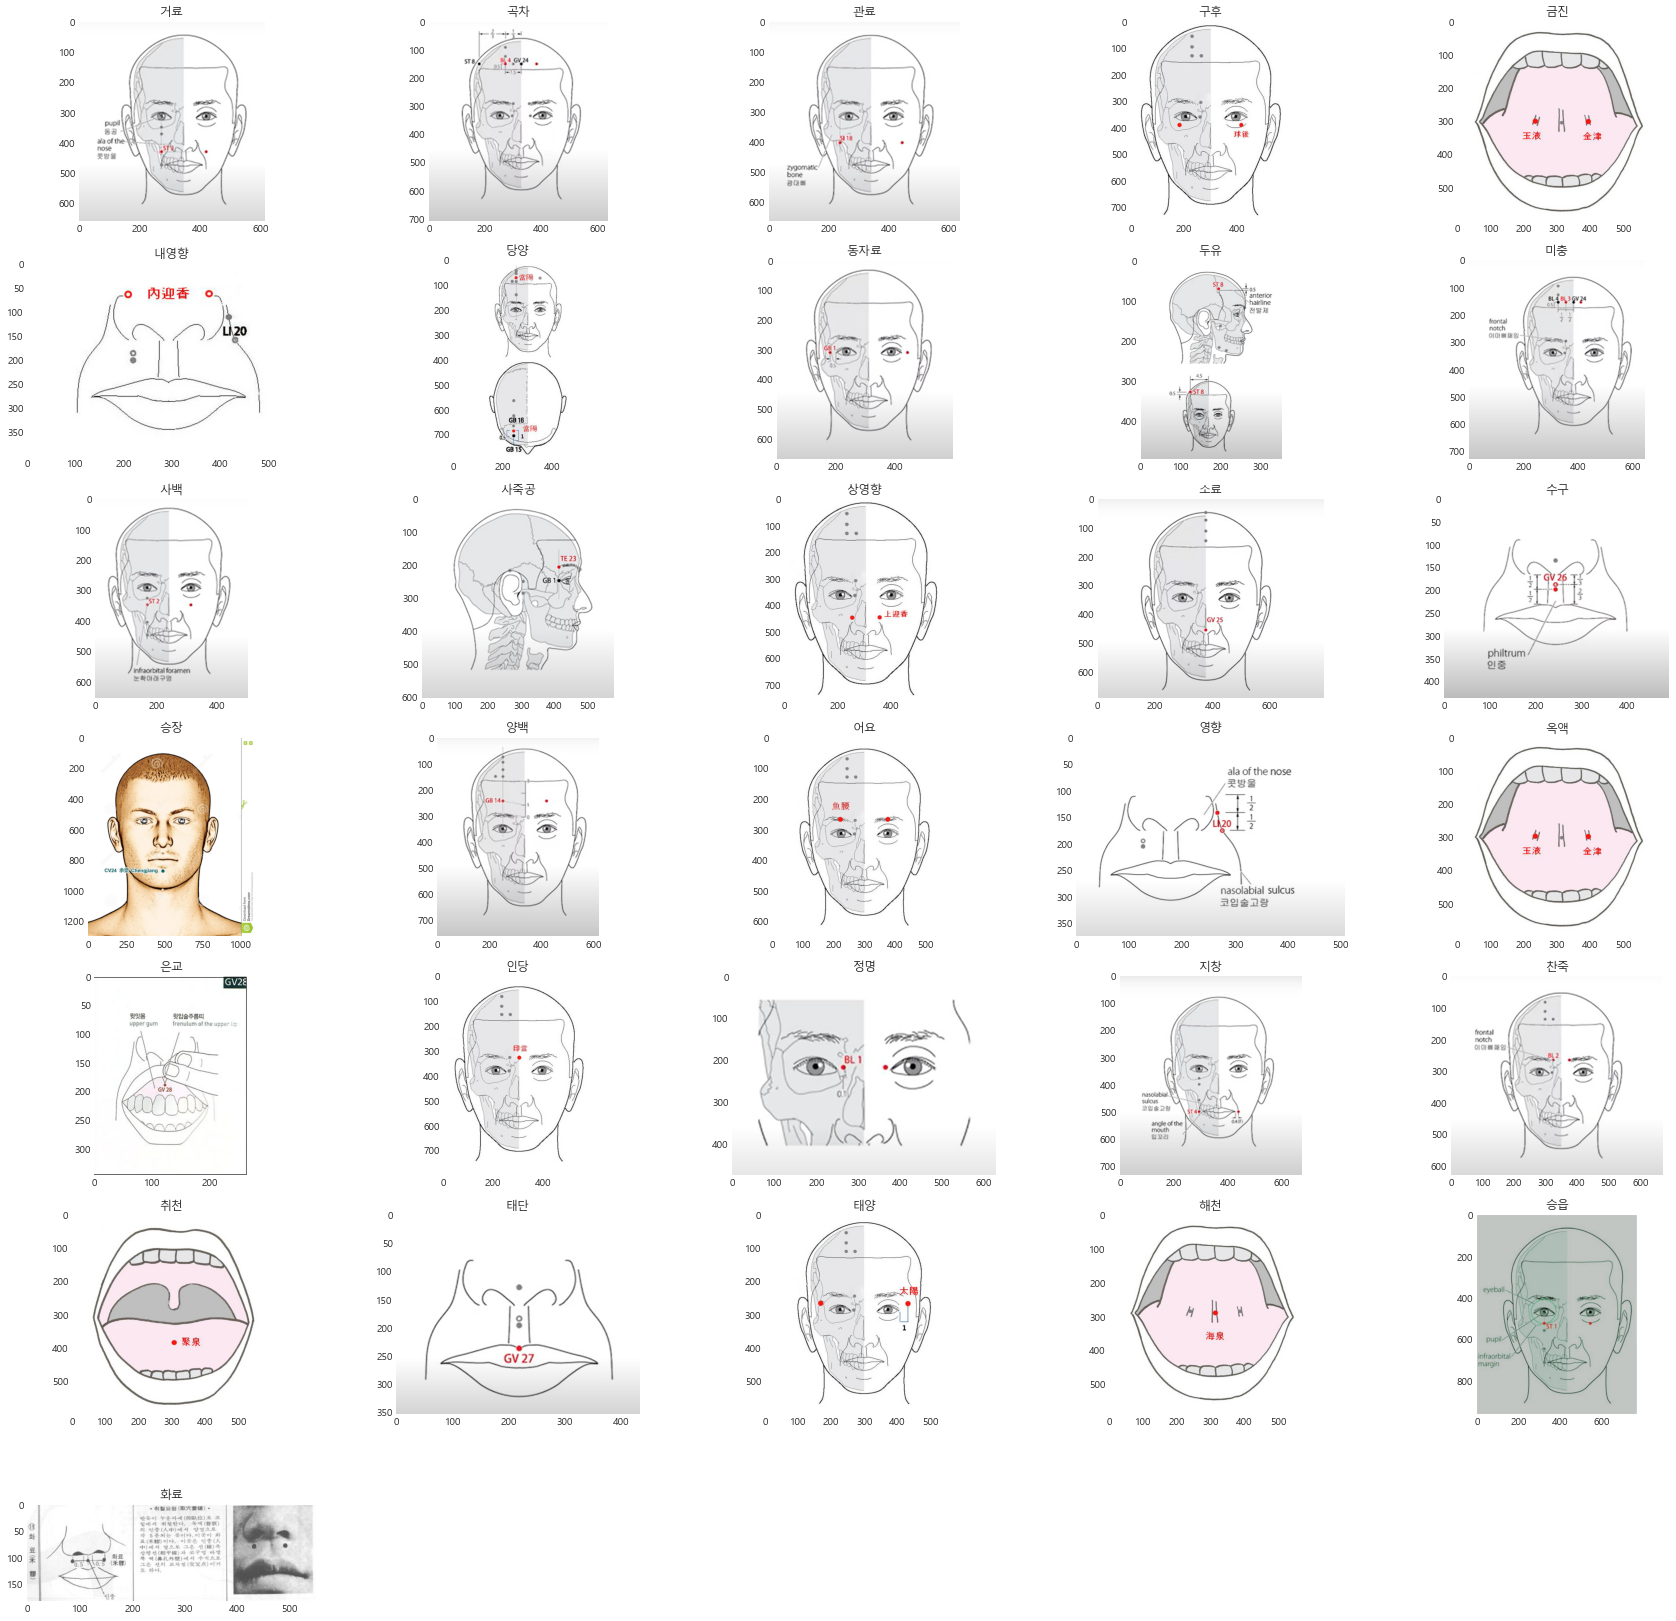

In [73]:
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-dark')
plt.figure(figsize=(30,30))
plt.rc("font", family="Malgun Gothic")
rows = 7
cols = 5
for i, img in enumerate(image):
    try:
        image_index = i + 1     # image index
        ttitle = os.path.basename(img).split('.')[0] # image title
        plt.subplot(rows,cols,image_index)
        plt.title(str(ttitle))
        plt.imshow(plt.imread(img))


    except:
        print(img)

In [44]:
formula_t = pd.read_csv(r'\\172.30.1.8\데이터사업추진팀\01. 프로젝트\12. NIPA AI 바우처\2022\03_동서한의원\Data\csv_data\표준경혈DB_encoding.csv',index_col=0)

In [56]:
formula_t.head()

,대분류,중분류,부위,취혈,침구법
0,수소음심경 (HT),HT1 극천,"겨드랑, 겨드랑 중심(centre of the axillary fossa), 겨드랑...","팔꿈치를 구부리고 팔을 들어 손바닥을 머리 뒤쪽에 두고, 겨드랑동맥이 뛰는 부위를 ...","- 直刺 0.2～0.5寸 (上向하여 겨드랑이로 향해)\n- 혈관, 신경을 찌르지 않..."
1,수소음심경 (HT),HT1 극천,"겨드랑, 겨드랑 중심(centre of the axillary fossa), 겨드랑...","팔꿈치를 구부리고 팔을 들어 손바닥을 머리 뒤쪽에 두고, 겨드랑동맥이 뛰는 부위를 ...","- 直刺 0.2～0.5寸 (上向하여 겨드랑이로 향해)\n- 혈관, 신경을 찌르지 않..."
2,수소음심경 (HT),HT2 청령,"위팔 안쪽면, 위팔두갈래근(biceps brachii muscle)의 안쪽모서리 바...","팔꿈치를 굽히고 위팔을 외전했을 때, 極泉(HT1)과 少海(HT3)를 연결하는 선에...",- 直刺 0.3～0.5寸 (臂內側에서 外側으로)\n- 斜刺 0.5～1寸
3,수소음심경 (HT),HT3 소해,"팔꿈치 앞안쪽면, 위팔뼈 안쪽위관절융기(medial epicondyle of the...","팔꿈치를 굽혔을 때, 팔오금주름 안쪽끝과 위팔뼈 안쪽위관절융기를 연결하는 선의 중점...",- 直刺 0.3～0.8寸\n- 斜刺 0.5～1寸
4,수소음심경 (HT),HT3 소해,"팔꿈치 앞안쪽면, 위팔뼈 안쪽위관절융기(medial epicondyle of the...","팔꿈치를 굽혔을 때, 팔오금주름 안쪽끝과 위팔뼈 안쪽위관절융기를 연결하는 선의 중점...",- 直刺 0.3～0.8寸\n- 斜刺 0.5～1寸


In [63]:
mid = list(formula_t['중분류'])
code = []
한글 = []
for m in mid:
    code.append(m.split(' ')[0])
    한글.append(m.split(' ')[1])
    

In [66]:
formula_t['한글'] = 한글
formula_t['코드'] = code

In [70]:
formula_t = formula_t[['대분류','중분류','한글','코드','부위','취혈','침구법']]

In [72]:
formula_t.to_csv('./표준경혈DB.csv',index=False,encoding='utf-8-sig')

In [73]:
formula = pd.read_csv('./표준경혈DB.csv')
formula

,대분류,중분류,한글,코드,부위,취혈,침구법
0,수소음심경 (HT),HT1 극천,극천,HT1,"겨드랑, 겨드랑 중심(centre of the axillary fossa), 겨드랑...","팔꿈치를 구부리고 팔을 들어 손바닥을 머리 뒤쪽에 두고, 겨드랑동맥이 뛰는 부위를 ...","- 直刺 0.2～0.5寸 (上向하여 겨드랑이로 향해)\n- 혈관, 신경을 찌르지 않..."
1,수소음심경 (HT),HT1 극천,극천,HT1,"겨드랑, 겨드랑 중심(centre of the axillary fossa), 겨드랑...","팔꿈치를 구부리고 팔을 들어 손바닥을 머리 뒤쪽에 두고, 겨드랑동맥이 뛰는 부위를 ...","- 直刺 0.2～0.5寸 (上向하여 겨드랑이로 향해)\n- 혈관, 신경을 찌르지 않..."
2,수소음심경 (HT),HT2 청령,청령,HT2,"위팔 안쪽면, 위팔두갈래근(biceps brachii muscle)의 안쪽모서리 바...","팔꿈치를 굽히고 위팔을 외전했을 때, 極泉(HT1)과 少海(HT3)를 연결하는 선에...",- 直刺 0.3～0.5寸 (臂內側에서 外側으로)\n- 斜刺 0.5～1寸
3,수소음심경 (HT),HT3 소해,소해,HT3,"팔꿈치 앞안쪽면, 위팔뼈 안쪽위관절융기(medial epicondyle of the...","팔꿈치를 굽혔을 때, 팔오금주름 안쪽끝과 위팔뼈 안쪽위관절융기를 연결하는 선의 중점...",- 直刺 0.3～0.8寸\n- 斜刺 0.5～1寸
4,수소음심경 (HT),HT3 소해,소해,HT3,"팔꿈치 앞안쪽면, 위팔뼈 안쪽위관절융기(medial epicondyle of the...","팔꿈치를 굽혔을 때, 팔오금주름 안쪽끝과 위팔뼈 안쪽위관절융기를 연결하는 선의 중점...",- 直刺 0.3～0.8寸\n- 斜刺 0.5～1寸
...,...,...,...,...,...,...,...
256,경외기혈 (EX),EX-LE3 백충와,백충와,EX-LE3,"넓적다리의 안쪽, 무릎뼈바닥(base of patellae) 안쪽끝에서 위로 3寸.","환자로 하여금 바르게 앉아 무릎을 굽히게 하거나 또는 바로 누워 무릎을 편 후, 무...",- 直刺 0.5～1寸
257,경외기혈 (EX),EX-LE4 내슬안,내슬안,EX-LE4,"무릎부위, 무릎뼈 아래모서리, 무릎인대(ligamentum patellae)의 안쪽...","무릎을 45° 구부리고, 무릎뼈 안쪽 아래의 오목한 곳에서 취혈한다.",- 무릎 중앙을 향해 斜刺 0.5～1寸\n- 外上方으로 1.5～2寸 刺入\n- 外膝...
258,경외기혈 (EX),EX-LE5 슬안,슬안,EX-LE5,"무릎부위, 무릎뼈 아래모서리, 무릎인대(ligamentum patellae)의 양쪽...","무릎을 45° 구부리고, 무릎뼈 양쪽 아래의 오목한 곳에서 취혈한다.","- 무릎 중앙을 향해 斜刺 0.5～1寸\n- 外膝眼에서는 內上方으로, 內膝眼에서는 ..."
259,경외기혈 (EX),EX-LE6 담낭,담낭,EX-LE6,"종아리의 가쪽, 종아리뼈작은머리에서 앞쪽 모서리 아래로 1.5寸 지점의 오목한 곳.","바로 눕거나 또는 옆으로 누운 후, 종아리뼈작은머리에서 앞쪽 모서리 아래로 1.5寸...",- 直刺 1～2寸


In [62]:
table = pd.read_csv(r'\\172.30.1.8\데이터사업추진팀\01. 프로젝트\12. NIPA AI 바우처\2022\03_동서한의원\Data\csv_data\얼굴경혈.csv')
table

,한글,한문,코드,설명,이미지
0,인당,印堂,EX-HN3,이마에서 두 눈썹 사이. 이마에서 두 눈썹 사이의 오목한 곳을 취혈한다.,./face_points\인당.png
1,어요,魚腰,EX-HN4,"머리의 이마부위(frontal region), 동공(pupil) 바로 위의 눈썹 중...",./face_points\어요.png
2,태양,太陽,EX-HN5,눈썹 바깥쪽 끝과 目外眥의 중점으로부터 뒤로 1寸.,./face_points\태양.png
3,구후,球後,EX-HN7,눈확 아래 모서리에서 바깥쪽 1/4와 안쪽 3/4의 지점.,./face_points\구후.png
4,상영향,上迎香,EX-HN8,코연골과 코선반능선이 만나는 곳으로 鼻唇溝(nasolabial fold)의 위쪽 끝...,./face_points\상영향.png
...,...,...,...,...,...
30,협거,頰車,ST6,"얼굴, 턱뼈각(angle of the mandible)에서 위앞쪽으로 1寸.",./face_points\협거.png
31,하관,下關,ST7,"얼굴, 광대활(zygomatic arch) 아래모서리의 중점과 턱뼈패임(mandib...",./face_points\하관.png
32,두유,頭維,ST8,"머리, 이마각(corner of the forehead) 前髮際(anterior h...",./face_points\두유.png
33,화료,禾髎,LI19,"얼굴, 인중 부위(philtrum)의 중점과 같은 높이, 콧구멍 가쪽모서리 아래 쪽.",./face_points\화료.jpg


In [103]:
한글 = list(table['한글'])

In [149]:
face_df = pd.DataFrame(columns = '대분류 중분류 한글 코드 부위 취혈 침구법'.split(' '))
for h in list(formula['한글']):
    if h in 한글:
        face_df=face_df.append(formula[formula['한글']==h])

In [152]:
len(set(list(face_df['한글'])))

20

In [134]:
'화료' in list(formula['한글'])

True

In [135]:
formula[formula['한글'] == '화료']

,대분류,중분류,한글,코드,부위,취혈,침구법
24,수양명대장경 (LI),LI19 화료,화료,LI19,"얼굴, 인중 부위(philtrum)의 중점과 같은 높이, 콧구멍 가쪽모서리 아래 쪽.",콧구멍가쪽모서리의 수직선과 인중 도랑의 중점에 해당하는 점의 수평선의 교점에서 취혈한다.,- 直刺 0.2～0.3寸\n- 斜刺 0.3～0.5寸
25,수양명대장경 (LI),LI19 화료,화료,LI19,"얼굴, 인중 부위(philtrum)의 중점과 같은 높이, 콧구멍 가쪽모서리 아래 쪽.",콧구멍가쪽모서리의 수직선과 인중 도랑의 중점에 해당하는 점의 수평선의 교점에서 취혈한다.,- 直刺 0.2～0.3寸\n- 斜刺 0.3～0.5寸
74,수양명대장경 (LI),LI19 화료,화료,LI19,"얼굴, 인중 부위(philtrum)의 중점과 같은 높이, 콧구멍 가쪽모서리 아래 쪽.",콧구멍가쪽모서리의 수직선과 인중 도랑의 중점에 해당하는 점의 수평선의 교점에서 취혈한다.,- 直刺 0.2～0.3寸\n- 斜刺 0.3～0.5寸


In [136]:
len(formula)

261

In [137]:
len(set(formula['한글']))

211

In [138]:
A = pd.read_csv('../표준경혈DB_.csv')

In [139]:
A[A['소분류'] == '화료']

,대분류,중분류,소분류,코드,부위,취혈,침구법,url
22,수양명대장경 (LI),LI19 화료,화료,LI19,"얼굴, 인중 부위(philtrum)의 중점과 같은 높이, 콧구멍 가쪽모서리 아래 쪽.",콧구멍가쪽모서리의 수직선과 인중 도랑의 중점에 해당하는 점의 수평선의 교점에서 취혈한다.,- 直刺 0.2～0.3寸\n- 斜刺 0.3～0.5寸,https://www.kmcric.com/database/acupoint/LI/LI19


In [158]:
nope = []
face_df = pd.DataFrame(columns = '대분류 중분류 소분류 코드 부위 취혈 침구법 url'.split(' '))
for h in BB:
    try:
        if h not in list(A['소분류']):
            nope.append(h)
        else:
            face_df=face_df.append(A[ A['소분류']==str(h)])

    except Exception as e:
        print(e)
        print(h)


In [162]:
len(nope)

15

In [163]:
face_df

,대분류,중분류,소분류,코드,부위,취혈,침구법,url
183,경외기혈 (EX),EX-HN3 인당,인당,EX-HN3,이마에서 두 눈썹 사이.,이마에서 두 눈썹 사이의 오목한 곳을 취혈한다.,- 橫刺 0.3～0.5寸\n- 三稜鍼으로 點刺出血.,https://www.kmcric.com/database/acupoint/EX/EX...
184,경외기혈 (EX),EX-HN4 어요,어요,EX-HN4,"머리의 이마부위(frontal region), 동공(pupil) 바로 위의 눈썹 중...","앞을 똑바로 바라보고, 동공(pupil) 바로 위의 눈썹 중앙 부위에서 취혈한다.",- 橫刺 0.3～0.5寸,https://www.kmcric.com/database/acupoint/EX/EX...
173,독맥 (GV),GV24 신정,신정,GV24,"머리, 앞정중선(anterior median line) 위, 前髮際(anterior...",前髮際가 뚜렷하지 않을 때에는 양쪽 눈썹 안쪽끝(medial ends of the ...,- 直刺 0.2～0.3寸\n- 斜刺 0.5～0.8寸 (鍼尖을 沿皮하여 刺入),https://www.kmcric.com/database/acupoint/GV/GV24
174,독맥 (GV),GV27 태단,태단,GV27,"얼굴, 윗입술결절(tubercle of the upper lip)의 중점.",인중 고랑 아랫부분과 붉은 입술이 이루는 경계선의 중점에서 취혈한다.,- 直刺 0.1～0.3寸\n- 斜刺 0.2～0.3寸,https://www.kmcric.com/database/acupoint/GV/GV27
110,족소양담경 (GB),GB1 동자료,동자료,GB1,"머리, 가쪽눈구석(outer canthus)에서 가쪽으로 0.5寸 오목한 곳.","눈초리(目外眥) 가쪽 약 0.5寸으로, 눈확가쪽모서리 오목한 곳에서 취혈한다.",- 直刺 0.2～0.3寸\n- 斜刺 0.3～0.5寸\n- 橫刺 0.5～1寸 (太陽을...,https://www.kmcric.com/database/acupoint/GB/GB1
111,족소양담경 (GB),GB2 청회,청회,GB2,"얼굴, 귀구슬사이패임(intertragic notch)과 아래턱뼈 관절돌기(cond...","입을 벌리고, 귀구슬사이패임 앞쪽의 오목한 곳에서 취혈한다. 聽宮(SI19)에서 수...",- 直刺 0.3～0.5寸\n- 斜刺 0.5～0.7寸\n- 입을 벌리고 약간 後斜方으...,https://www.kmcric.com/database/acupoint/GB/GB2
112,족소양담경 (GB),GB3 상관,상관,GB3,"머리, 광대활(zygomatic arch) 중점 위쪽의 오목한 곳.","광대활 위쪽, 下關(ST7) 위쪽의 오목한 곳에서 취혈한다.",- 直刺 0.2～0.3寸\n- 斜刺 0.3～0.5寸,https://www.kmcric.com/database/acupoint/GB/GB3
73,족태양방광경 (BL),BL1 정명,정명,BL1,"얼굴, 안쪽눈구석(inner canthus)의 위 안쪽 부분과 눈확(orbit)의 ...","눈을 감고 눈동자를 반대편으로 돌린 상태에서, 안쪽눈구석에서 위안쪽으로 0.1寸 지...",- 直刺 0.1～0.3寸 (不宜深刺)\n- 斜刺 0.3～0.7寸,https://www.kmcric.com/database/acupoint/BL/BL1
74,족태양방광경 (BL),BL2 찬죽,찬죽,BL2,"머리, 눈썹 안쪽끝의 오목한 곳.","이마뼈패임(frontal notch), 睛明(BL1)에서 수직으로 위쪽, 눈썹 안쪽...",- 直刺 0.3～0.5寸\n- 三稜鍼으로 點刺出血\n- 眼疾患 치료시 鍼尖을 下向하...,https://www.kmcric.com/database/acupoint/BL/BL2
75,족태양방광경 (BL),BL3 미충,미충,BL3,"머리, 이마뼈패임(frontal notch)의 위 쪽, 前髮際(anterior ha...",神庭(GV24)을 지나는 수평선과 攢竹(BL2)을 지나는 수직선이 만나는 곳에서 취...,- 直刺 0.2～0.3寸\n- 斜刺 0.3～0.5寸 (鍼尖을 上方 혹은 外方으로 향...,https://www.kmcric.com/database/acupoint/BL/BL3


--------------------------------------------------------------------------

# 2022.03.23

In [24]:
%pwd

'\\\\172.30.1.8\\데이터사업추진팀\\01. 프로젝트\\12. NIPA AI 바우처\\2022\\03_동서한의원\\Data\\csv_data'

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')

import matplotlib 
plt.rc("font", family="Malgun Gothic")

In [29]:
face_df = pd.read_csv('./얼굴경혈.csv')

In [38]:
face_df[face_df['한글']=='곡빈']['설명'][1]

'머리, 귓바퀴끝(auricular apex)을 지나는 수평선과 관자놀이 머리카락경계선(temple hairline)의 뒤모서리를 지나는 수직선이 만나는 지점.'

In [39]:
face_on = '거료 곡차 관료 구후 동자료 미충 사백 상영향 소료 수구 승읍 승장 신정 양백 어요 영향 인당 정명 지창 찬죽 태단 태양 화료'.split(' ')

In [40]:
face_side = '곡빈 대영 두유 사죽공 상관 청궁 청회 하관 함염 현로 현리 협거'.split(' ')

In [52]:
len(face_side)

12

In [47]:
front = pd.DataFrame(columns=face_df.columns)
side = pd.DataFrame(columns=face_df.columns)
for face in face_on:
    front = front.append(face_df[face_df['한글']==face])
for si in face_side:
    side = side.append(face_df[face_df['한글']==si])

In [50]:
%pwd

'\\\\172.30.1.8\\데이터사업추진팀\\01. 프로젝트\\12. NIPA AI 바우처\\2022\\03_동서한의원\\Data\\csv_data'

In [53]:
front = front.reset_index()
front = front.drop('index',axis=1)
front.to_csv('./얼굴정면혈_23.csv',index=False, encoding='utf-8-sig')

side = side.reset_index()
side = side.drop('index',axis=1)
side.to_csv('./얼굴측면혈_12.csv',index=False, encoding='utf-8-sig')

In [49]:
side

,한글,한문,코드,설명,이미지
1,곡빈,曲鬢,GB7,"머리, 귓바퀴끝(auricular apex)을 지나는 수평선과 관자놀이 머리카락경계...",./face_points\곡빈.png
5,대영,大迎,ST5,"얼굴, 턱뼈각(angle of the mandible)앞쪽, 깨물근(masseter...",./face_points\대영.png
7,두유,頭維,ST8,"머리, 이마각(corner of the forehead) 前髮際(anterior h...",./face_points\두유.png
10,사죽공,絲竹空,TE23,"머리, 눈썹 가쪽끝의 오목한 곳.",./face_points\사죽공.png
11,상관,上關,GB3,"머리, 광대활(zygomatic arch) 중점 위쪽의 오목한 곳.",./face_points\상관.png
25,청궁,聽宮,SI19,"얼굴, 귀구슬(tragus) 중심의 앞모서리와 아래턱뼈 관절돌기(condylar p...",./face_points\청궁.png
26,청회,聽會,GB2,"얼굴, 귀구슬사이패임(intertragic notch)과 아래턱뼈 관절돌기(cond...",./face_points\청회.png
29,하관,下關,ST7,"얼굴, 광대활(zygomatic arch) 아래모서리의 중점과 턱뼈패임(mandib...",./face_points\하관.png
30,함염,頷厭,GB4,"머리, 頭維(ST8)와 曲鬢(GB7)을 연결하는 곡선에서 위쪽으로부터 1/4과 아래...",./face_points\함염.png
31,현로,懸顱,GB5,"머리, 頭維(ST8)와 曲鬢(GB7)을 연결하는 곡선의 중점.",./face_points\현로.png


-------------------------------------

# 2022.03.24

In [1]:
face = 'L20 L19 SI18 SI19 TE16 TE17 TE18 TE19 TE20 TE21 TE22 TE23 ST1 ST2 ST3 ST4 ST5 ST6 ST7 ST8 BL1 BL2 BL3 BL4 BL5 BL6 BL7 BL8 BL9 BL10 GB1 GB2 GB3 GB4 GB5 GB6 GB7 GB8 GB9 GB10 GB11 GB12 GB13 GB14 GB15 GB16 GB17 GB18 GB19 GB20 GV21 GV22 GV23 GV24 GV25 GV26 GV27 GV28 CV24'.split(' ')

In [2]:
ex_face = '사신총,당양,인당,어요,태양,이첨,구후,상영향,내영향,취천,해천,금진,옥액,예명'.split(',')

In [4]:
import pandas as pd

In [5]:
total = pd.read_csv('./표준경혈DB.csv')
total

,대분류,중분류,소분류,코드,부위,취혈,침구법,url
0,수소음심경 (HT),HT1 극천,극천,HT1,"겨드랑, 겨드랑 중심(centre of the axillary fossa), 겨드랑...","팔꿈치를 구부리고 팔을 들어 손바닥을 머리 뒤쪽에 두고, 겨드랑동맥이 뛰는 부위를 ...","- 直刺 0.2～0.5寸 (上向하여 겨드랑이로 향해)\n- 혈관, 신경을 찌르지 않...",https://www.kmcric.com/database/acupoint/HT/HT1
1,수소음심경 (HT),HT2 청령,청령,HT2,"위팔 안쪽면, 위팔두갈래근(biceps brachii muscle)의 안쪽모서리 바...","팔꿈치를 굽히고 위팔을 외전했을 때, 極泉(HT1)과 少海(HT3)를 연결하는 선에...",- 直刺 0.3～0.5寸 (臂內側에서 外側으로)\n- 斜刺 0.5～1寸,https://www.kmcric.com/database/acupoint/HT/HT2
2,수소음심경 (HT),HT5 통리,통리,HT5,"아래팔 앞안쪽면, 자쪽손목굽힘근힘줄(flexor carpi ulnaris tendo...","콩알뼈 몸쪽모서리 노쪽에서 몸 쪽으로 1寸, 즉 神門(HT7)에서 몸 쪽으로 1寸,...",- 直刺 0.3～0.5寸\n- 斜刺 0.5～1寸,https://www.kmcric.com/database/acupoint/HT/HT5
3,수소음심경 (HT),HT7 신문,신문,HT7,"손목 앞안쪽면, 자쪽손목굽힘근힘줄(flexor carpi ulnaris tendon...","손바닥을 위로 향했을 때, 콩알뼈(pisiform bone) 몸 쪽 모서리의 노쪽 ...",- 直刺 0.2～0.5寸\n- 斜刺 0.5～0.8寸,https://www.kmcric.com/database/acupoint/HT/HT7
4,수소음심경 (HT),HT9 소충,소충,HT9,"새끼손가락, 끝마디뼈(distal phalanx)의 노쪽, 새끼손톱 노쪽 뿌리각(r...",새끼손톱의 노쪽모서리를 지나는 수직선과 손톱뿌리를 지나는 수평선이 만나는 지점에서 ...,- 直刺 0.1～0.2寸\n- 斜刺 0.2～0.3寸\n- 三稜鍼으로 點刺出血,https://www.kmcric.com/database/acupoint/HT/HT9
...,...,...,...,...,...,...,...,...
204,경외기혈 (EX),EX-LE3 백충와,백충와,EX-LE3,"넓적다리의 안쪽, 무릎뼈바닥(base of patellae) 안쪽끝에서 위로 3寸.","환자로 하여금 바르게 앉아 무릎을 굽히게 하거나 또는 바로 누워 무릎을 편 후, 무...",- 直刺 0.5～1寸,https://www.kmcric.com/database/acupoint/EX/EX...
205,경외기혈 (EX),EX-LE4 내슬안,내슬안,EX-LE4,"무릎부위, 무릎뼈 아래모서리, 무릎인대(ligamentum patellae)의 안쪽...","무릎을 45° 구부리고, 무릎뼈 안쪽 아래의 오목한 곳에서 취혈한다.",- 무릎 중앙을 향해 斜刺 0.5～1寸\n- 外上方으로 1.5～2寸 刺入\n- 外膝...,https://www.kmcric.com/database/acupoint/EX/EX...
206,경외기혈 (EX),EX-LE5 슬안,슬안,EX-LE5,"무릎부위, 무릎뼈 아래모서리, 무릎인대(ligamentum patellae)의 양쪽...","무릎을 45° 구부리고, 무릎뼈 양쪽 아래의 오목한 곳에서 취혈한다.","- 무릎 중앙을 향해 斜刺 0.5～1寸\n- 外膝眼에서는 內上方으로, 內膝眼에서는 ...",https://www.kmcric.com/database/acupoint/EX/EX...
207,경외기혈 (EX),EX-LE6 담낭,담낭,EX-LE6,"종아리의 가쪽, 종아리뼈작은머리에서 앞쪽 모서리 아래로 1.5寸 지점의 오목한 곳.","바로 눕거나 또는 옆으로 누운 후, 종아리뼈작은머리에서 앞쪽 모서리 아래로 1.5寸...",- 直刺 1～2寸,https://www.kmcric.com/database/acupoint/EX/EX...


In [12]:
import warnings
warnings.filterwarnings('ignore')

In [18]:
total_face = pd.DataFrame(columns=total.columns)
for i in face:
    total_face = total_face.append(total[total['코드']==i])

In [20]:
len(total_face)

25

In [21]:
len(ex_face)

14

In [22]:
len(face)

59

In [15]:
for ex in ex_face:
    total_face = total_face.append(total[total['소분류']==ex])

In [16]:
len(total_face)

34

In [17]:
total_face

,대분류,중분류,소분류,코드,부위,취혈,침구법,url
35,수태양소장경 (SI),SI18 관료,관료,SI18,"얼굴, 광대뼈(zygomatic bone) 아래쪽, 가쪽눈구석(outer canth...",광대뼈 아래모서리의 수평선과 가쪽눈 구석의 수직선이 만나는 부위의 오목한 곳에서 취...,- 直刺 0.2～0.3寸\n- 斜刺 0.5～1寸 (下方으로 향해)\n- 禁鍼灸 (『...,https://www.kmcric.com/database/acupoint/SI/SI18
36,수태양소장경 (SI),SI19 청궁,청궁,SI19,"얼굴, 귀구슬(tragus) 중심의 앞모서리와 아래턱뼈 관절돌기(condylar p...","입을 약간 벌릴 때 나타나는 귀구슬 중심의 앞쪽 오목한 곳으로, 耳門(TE21)과 ...",- 直刺 0.3～0.5寸\n- 斜刺 0.5～1寸 (입을 벌리고 약간 下部로 향하여),https://www.kmcric.com/database/acupoint/SI/SI19
49,수소양삼초경 (TE),TE20 각손,각손,TE20,"머리, 귓바퀴끝(auricular apex)의 바로 위쪽 지점.","귓바퀴를 앞으로 접어 머리에 눌러 붙일 때, 귓바퀴끝이 머리에 닿는 지점에서 취혈한다.",- 直刺 0.1～0.2寸\n- 斜刺 0.1～0.3寸,https://www.kmcric.com/database/acupoint/TE/TE20
50,족양명위경 (ST),ST2 사백,사백,ST2,"얼굴, 눈확아래구멍(infraorbital foramen).",눈확아래구멍은 동공(pupil)에서 수직으로 아래쪽에서 촉지된다.,- 直刺 0.2～0.3寸\n- 斜刺 0.3～0.5寸,https://www.kmcric.com/database/acupoint/ST/ST2
51,족양명위경 (ST),ST3 거료,거료,ST3,"얼굴, 동공(pupil)에서 수직으로 아래 쪽, 콧방울(ala of the nose...","고개를 들고 앞을 바로 볼 때, 동공을 지나는 수직선과 콧방울 아래모서리를 지나는 ...",- 直刺 0.3～0.5寸\n- 斜刺 0.5～1寸,https://www.kmcric.com/database/acupoint/ST/ST3
52,족양명위경 (ST),ST4 지창,지창,ST4,"얼굴, 입꼬리에서 가쪽으로 0.4寸.","입꼬리 옆쪽, 코입술고랑(nasolabialsulcus) 위 혹은 코입술고랑의 연장...",- 直刺 0.3～0.5寸\n- 橫刺 1～1.5寸\n- 顔面神經麻痺 치료시 頰車(ST...,https://www.kmcric.com/database/acupoint/ST/ST4
53,족양명위경 (ST),ST5 대영,대영,ST5,"얼굴, 턱뼈각(angle of the mandible)앞쪽, 깨물근(masseter...","입을 다물고, 입안에 공기를 채울 때, 아래턱뼈뿔 아래앞쪽에 나타나는 도랑처럼 패인...",- 直刺 0.2～0.3寸\n- 斜刺 0.5～1寸,https://www.kmcric.com/database/acupoint/ST/ST5
54,족양명위경 (ST),ST6 협거,협거,ST6,"얼굴, 턱뼈각(angle of the mandible)에서 위앞쪽으로 1寸.","턱뼈각의 이등분선 위, 입과 치아를 굳게 다물면 깨물근(masseter muscle...",- 直刺 0.3～0.5寸\n- 斜刺 0.5～1寸 (깨물근경련 치료시 위쪽을 향해 刺...,https://www.kmcric.com/database/acupoint/ST/ST6
55,족양명위경 (ST),ST7 하관,하관,ST7,"얼굴, 광대활(zygomatic arch) 아래모서리의 중점과 턱뼈패임(mandib...","입을 다물고, 上關(GB3)에서 수직으로 아래쪽, 광대활 아래쪽의 오목한 곳에서 취...",- 艾炷灸 3～5壯\n- 艾條灸 5～10分,https://www.kmcric.com/database/acupoint/ST/ST7
73,족태양방광경 (BL),BL1 정명,정명,BL1,"얼굴, 안쪽눈구석(inner canthus)의 위 안쪽 부분과 눈확(orbit)의 ...","눈을 감고 눈동자를 반대편으로 돌린 상태에서, 안쪽눈구석에서 위안쪽으로 0.1寸 지...",- 直刺 0.1～0.3寸 (不宜深刺)\n- 斜刺 0.3～0.7寸,https://www.kmcric.com/database/acupoint/BL/BL1
